<a href="https://colab.research.google.com/github/NereydaMed/Examen-OPI/blob/main/ExamenOpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coneccion con datos en drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

path = '/content/drive/MyDrive/carpetas_completa_marzo_2021.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÃO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÃRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÃN PARA LA ATENCIÃN DEL DELITO DE...,ORIENTEII,UI-3CD,ROBO DE VEHÃCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÃN PARA LA ATENCIÃN DE NIÃOS, NI...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÃN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN




```
# Tiene formato de código
```
**1.	¿Qué pruebas identificarías para asegurar la calidad de estos datos? **
Reviso rapidamente que tipos de datos tiene la base, cuantas columnas son y cuantos valores son no null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188790 entries, 0 to 1188789
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1188356 non-null  float64
 1   mes_hechos            1188356 non-null  object 
 2   fecha_hechos          1188356 non-null  object 
 3   ao_inicio             1188790 non-null  int64  
 4   mes_inicio            1188790 non-null  object 
 5   fecha_inicio          1188790 non-null  object 
 6   delito                1188790 non-null  object 
 7   fiscalia              1188788 non-null  object 
 8   agencia               1188790 non-null  object 
 9   unidad_investigacion  1188563 non-null  object 
 10  categoria_delito      1188790 non-null  object 
 11  calle_hechos          1185772 non-null  object 
 12  calle_hechos2         465963 non-null   object 
 13  colonia_hechos        1140410 non-null  object 
 14  alcaldia_hechos       1185543 non-

In [ ]:
df.shape

(1188790, 19)

Con la siguiente sentencia reviso si hay datos null y despues los gráfico

In [ ]:
df.isnull().any().any()

True

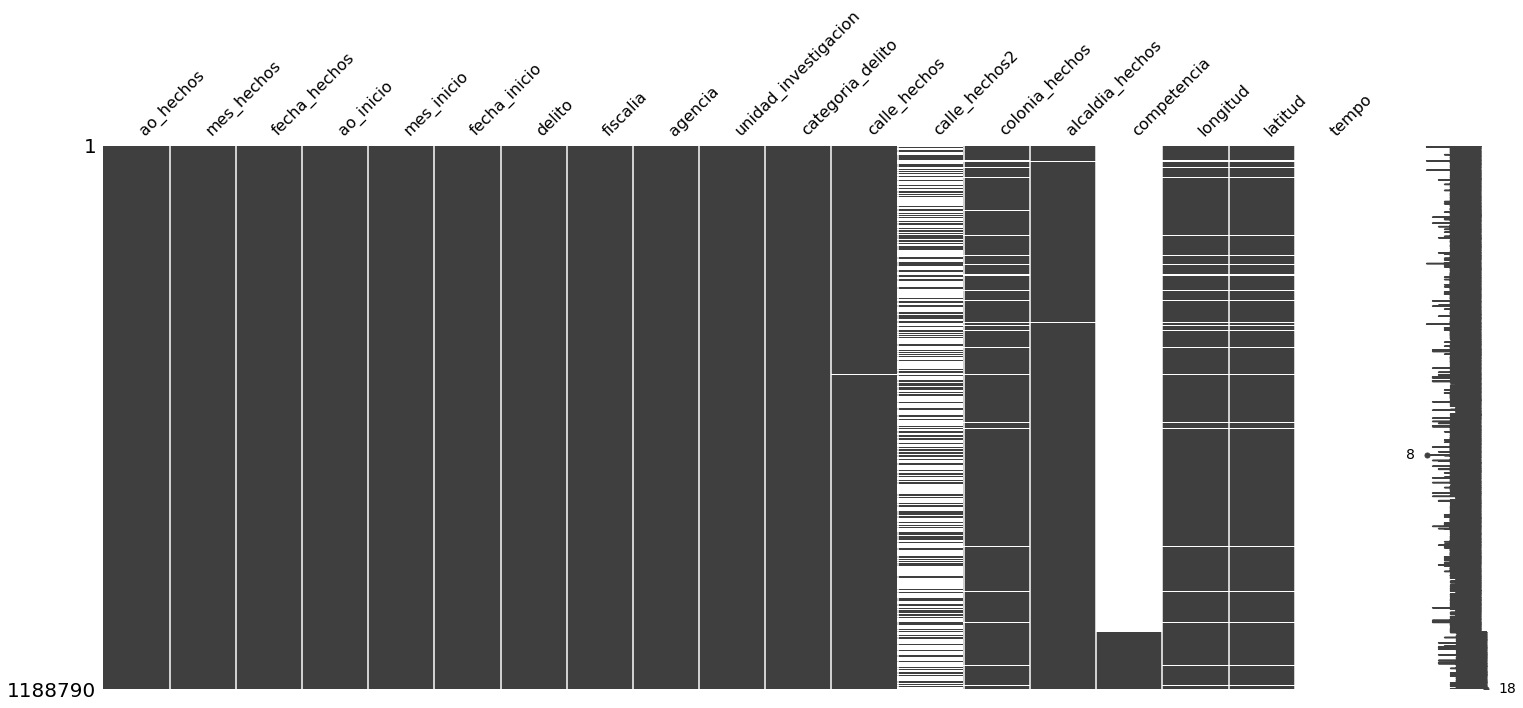

In [ ]:
msno.matrix(df)

In [ ]:
#Eliminación de columnas nulas
df_data=pd.DataFrame(df)
df_data=df_data.drop(['tempo', 'competencia','calle_hechos2'], axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188790 entries, 0 to 1188789
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1188356 non-null  float64
 1   mes_hechos            1188356 non-null  object 
 2   fecha_hechos          1188356 non-null  object 
 3   ao_inicio             1188790 non-null  int64  
 4   mes_inicio            1188790 non-null  object 
 5   fecha_inicio          1188790 non-null  object 
 6   delito                1188790 non-null  object 
 7   fiscalia              1188788 non-null  object 
 8   agencia               1188790 non-null  object 
 9   unidad_investigacion  1188563 non-null  object 
 10  categoria_delito      1188790 non-null  object 
 11  calle_hechos          1185772 non-null  object 
 12  colonia_hechos        1140410 non-null  object 
 13  alcaldia_hechos       1185543 non-null  object 
 14  longitud              1141375 non-

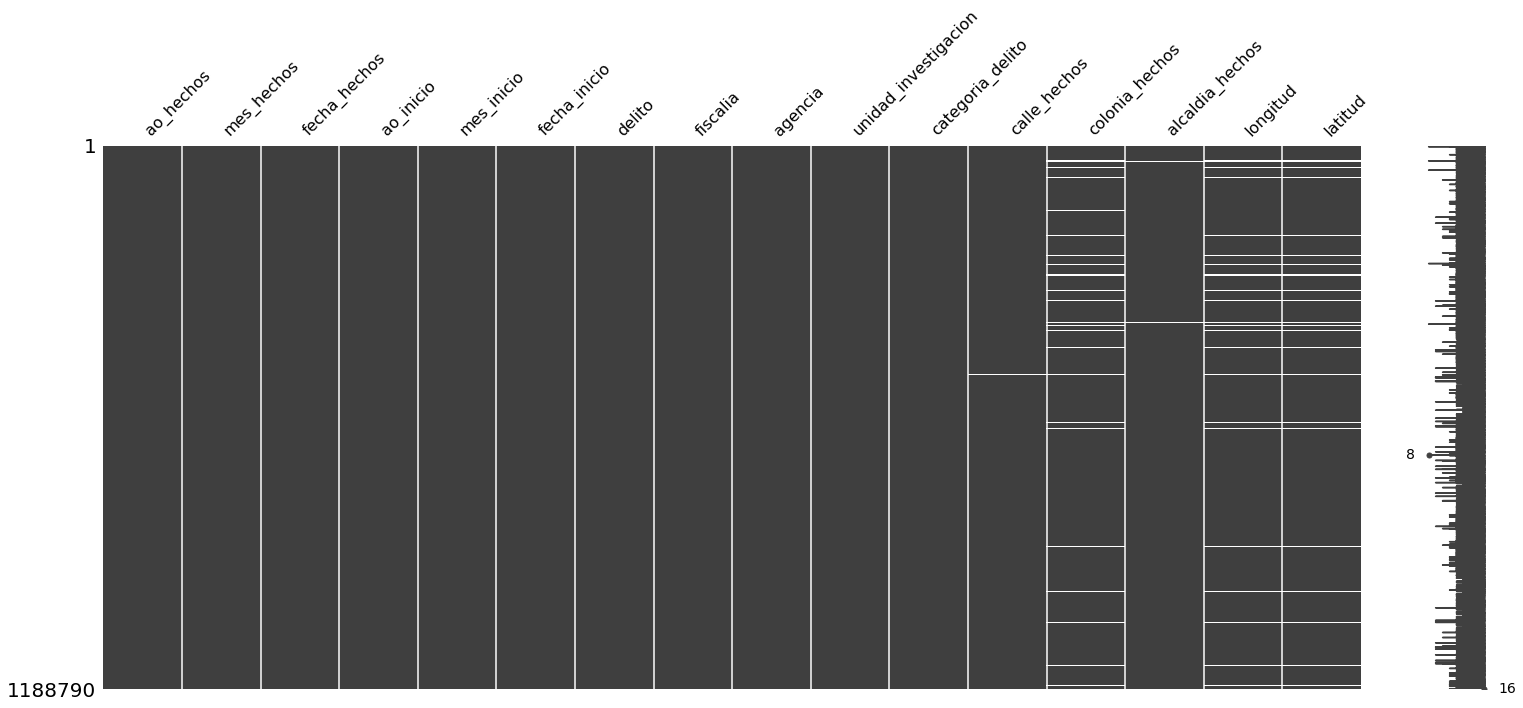

In [ ]:
#Reviso la cantidad de valores nulos sobrantes
msno.matrix(df_data)

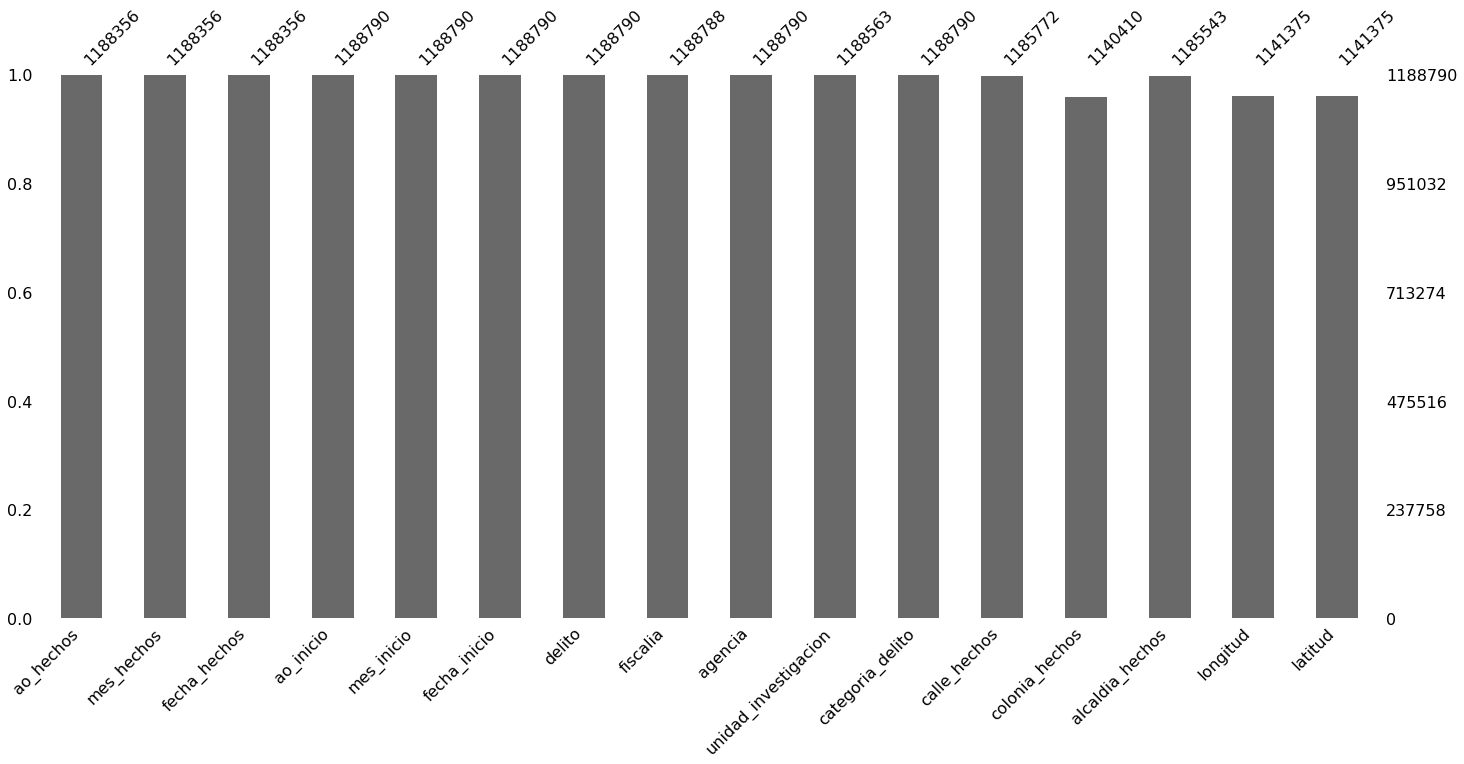

In [ ]:
msno.bar(df_data)

Como las filas con datos nulos son menores a un 10% aprox. procedemos a eliminarlas

In [ ]:
df_data=df_data.dropna()
df_data.isnull().any().any() #corroboramos que no queden valores nulos

False

In [ ]:
#Elimino tuplas duplicadas
df_data = df_data.drop_duplicates()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188790 entries, 0 to 1188789
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1188356 non-null  float64
 1   mes_hechos            1188356 non-null  object 
 2   fecha_hechos          1188356 non-null  object 
 3   ao_inicio             1188790 non-null  int64  
 4   mes_inicio            1188790 non-null  object 
 5   fecha_inicio          1188790 non-null  object 
 6   delito                1188790 non-null  object 
 7   fiscalia              1188788 non-null  object 
 8   agencia               1188790 non-null  object 
 9   unidad_investigacion  1188563 non-null  object 
 10  categoria_delito      1188790 non-null  object 
 11  calle_hechos          1185772 non-null  object 
 12  colonia_hechos        1140410 non-null  object 
 13  alcaldia_hechos       1185543 non-null  object 
 14  longitud              1141375 non-

In [ ]:
#Cambio de formato de fechas
df_data['fecha_hechos']=pd.to_datetime(df_data['fecha_hechos'],errors='coerce')
df_data['fecha_inicio']=pd.to_datetime(df_data['fecha_inicio'],errors='coerce')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188790 entries, 0 to 1188789
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ao_hechos             1188356 non-null  float64       
 1   mes_hechos            1188356 non-null  object        
 2   fecha_hechos          1188356 non-null  datetime64[ns]
 3   ao_inicio             1188790 non-null  int64         
 4   mes_inicio            1188790 non-null  object        
 5   fecha_inicio          1177429 non-null  datetime64[ns]
 6   delito                1188790 non-null  object        
 7   fiscalia              1188788 non-null  object        
 8   agencia               1188790 non-null  object        
 9   unidad_investigacion  1188563 non-null  object        
 10  categoria_delito      1188790 non-null  object        
 11  calle_hechos          1185772 non-null  object        
 12  colonia_hechos        1140410 non-null  ob

¿Qué rango de tiempo consideran los datos?  

In [ ]:

df_data["Full_date"] = df_data['ao_hechos'].astype(str) + "-" + df["mes_hechos"].astype(str)
by_year = df_data.sort_values('Full_date',ascending=True)
by_year=by_year.Full_date.unique() #mandara el nul al final por ello en la siguiente sentencia es mens dos
print(by_year[0],"|", by_year[len(by_year)-2])

1906.0-Junio | 2021.0-Febrero


¿Cuáles son los 5 delitos más frecuentes?  

In [ ]:
df_data.delito.value_counts()



VIOLENCIA FAMILIAR                                                        116871
FRAUDE                                                                     69831
ROBO DE OBJETOS                                                            69024
ROBO A NEGOCIO SIN VIOLENCIA                                               65516
AMENAZAS                                                                   62086
                                                                           ...  
HOMICIDIO DOLOSO                                                               1
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y ESTERILIZACION FORZADA         1
PROCREACION ASISTIDA                                                           1
DESACATO                                                                       1
CALUMNIAS                                                                      1
Name: delito, Length: 339, dtype: int64

5.	¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?  


In [ ]:
df= df_data.groupby('alcaldia_hechos')['delito'].agg(Cuenta="count").reset_index()
df.max()

alcaldia_hechos    XOCHIMILCO
Cuenta                 176286
dtype: object

In [ ]:
df.min()

alcaldia_hechos    ALVARO OBREGON
Cuenta                       8000
dtype: object

6.	 Dentro de cada alcaldía, cuáles son las tres colonias con más delitos  

In [ ]:
df_data.groupby('alcaldia_hechos')['fiscalia'].agg(['count', 'nunique'])

,count,nunique
alcaldia_hechos,,
ALVARO OBREGON,78110,71
AZCAPOTZALCO,56905,69
BENITO JUAREZ,97337,71
COYOACAN,77495,70
CUAJIMALPA DE MORELOS,17157,66
CUAUHTEMOC,176286,72
GUSTAVO A MADERO,114943,71
IZTACALCO,48790,69
IZTAPALAPA,170422,70


3.	¿Cómo se distribuye el número de delitos en la CDMX?  

In [ ]:
dh= df_data.groupby(['ao_hechos',''])['delito'].agg(Cant_Delitos="count").reset_index()
dh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ao_hechos     71 non-null     float64
 1   Cant_Delitos  71 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


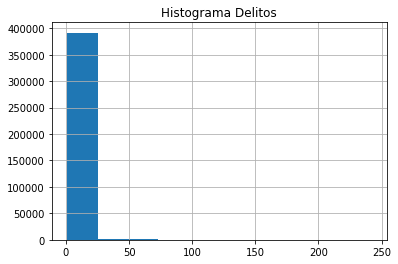

<Figure size 432x288 with 0 Axes>

In [ ]:
#Histograma
from datetime import datetime
import matplotlib.pyplot as plt 

plt.title('Histograma Delitos')
plt.hist(dh.Cant_Delitos)
plt.grid(True)
plt.show()
plt.clf()

4.	Identifica los delitos que van al alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).  

In [ ]:
#No logre terminarla
ult_ao = df_data.loc[:, 'ao_hechos'] == 2020.0
df_2 = df_data.loc[ult_ao]
df_2=df_2.loc[:,['fecha_hechos','delito']]
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188671 entries, 931939 to 1188741
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   fecha_hechos  188671 non-null  datetime64[ns]
 1   delito        188671 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.3+ MB


In [ ]:
df_2=df_2.groupby(['fecha_hechos','delito'])['delito'].agg(Cuenta="count").reset_index()


In [ ]:
keys = list(df_2['delito'].unique())
vals = range(1,len(keys)-1)
act = dict(zip(keys, vals))
act

In [ ]:
df_2['delito'] = df['delito'].map(act)
df_2.head()

,fecha_hechos,delito,Cuenta
0,2020-01-01,32.0,1
1,2020-01-01,15.0,1
2,2020-01-01,60.0,1
3,2020-01-01,11.0,1
4,2020-01-01,245.0,1


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 14471 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


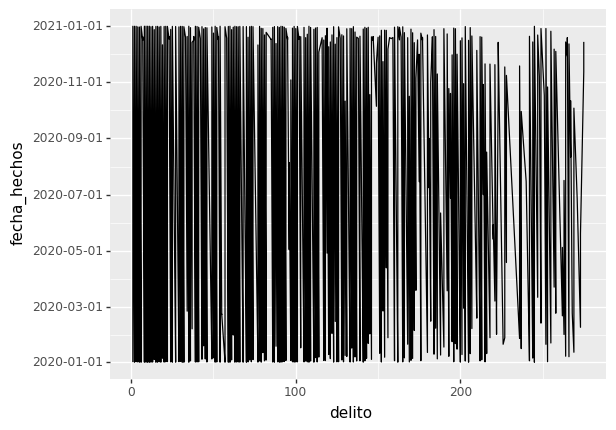

<ggplot: (8735548349321)>

In [ ]:
(p9.ggplot(data=df_2,
           mapping=p9.aes(y='fecha_hechos',
                          x='delito'))
    + p9.geom_line()
)

6.	 Dentro de cada alcaldía, cuáles son las tres colonias con más delitos  

In [ ]:
#Pregunta 6
df_3= df_data.groupby(['alcaldia_hechos','colonia_hechos'])['delito'].agg(Cuenta="count").reset_index()
a=df_3.iloc[df_3.groupby('alcaldia_hechos').agg(max_ = ('Cuenta', lambda data: data.idxmax())).max_]

,alcaldia_hechos,colonia_hechos,Cuenta
121,ALVARO OBREGON,JARDINES DEL PEDREGAL,3618
286,AZCAPOTZALCO,EL ROSARIO,4090
378,BENITO JUAREZ,DEL VALLE CENTRO,17347
512,COYOACAN,PEDREGAL DE SANTO DOMINGO,6961
568,CUAJIMALPA DE MORELOS,CUAJIMALPA,2610
607,CUAUHTEMOC,CENTRO,39114
748,GUSTAVO A MADERO,LINDAVISTA,5164
833,IZTACALCO,AGRÃCOLA ORIENTAL,9636
922,IZTAPALAPA,CENTRAL DE ABASTO,7920
1156,LA MAGDALENA CONTRERAS,SAN JERÃNIMO LÃDICE,2132


7.	 ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?  

In [ ]:
#Pregunta 7 no logro avanzar
from datetime import datetime
import matplotlib.pyplot as plt 

dx= df_data.groupby('fecha_hechos')['delito'].agg(Cant_Delitos="count").reset_index()
dx.index = dx.fecha_hechos

Text(0.5, 1.0, 'Box Plot ')

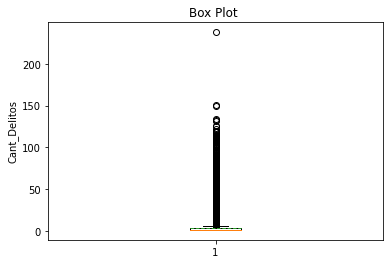

In [ ]:

plt.boxplot(dx['Cant_Delitos'], showmeans=True, meanline=True)
plt.ylabel('Cant_Delitos')
plt.title('Box Plot ')

In [ ]:
dx = dx.resample('D').mean()

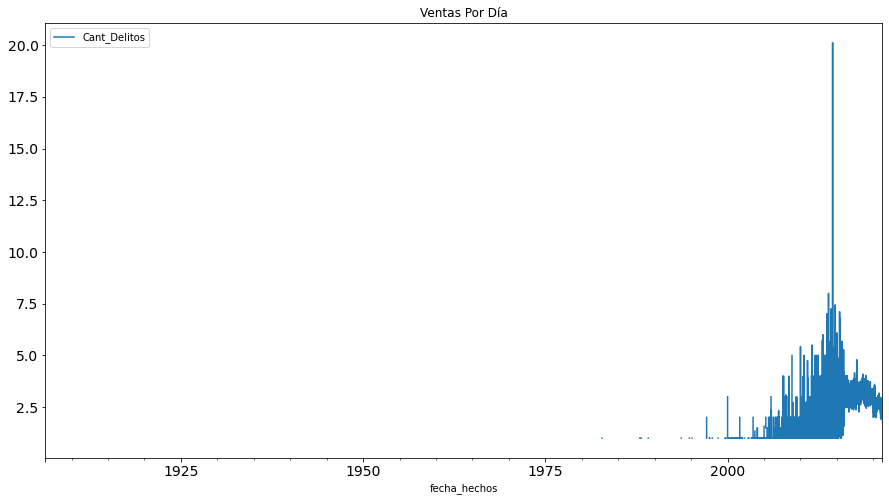

In [ ]:
dx.plot(figsize=(15,8), title= 'Ventas Por Día', fontsize=14)
plt.show()